# Bonus: Machine Learning [20]

Read and loaded the cleaned dataset for machine learning analysis.
Removed duplicate entries to ensure clean data and converted salary columns ('Min Salary', 'Max Salary', 'Average Salary') to numeric types, treating 'Unknown' values as missing values.
Filled missing salary values using the median salary to avoid bias from extreme values.

We also performed feature engineering:
Encoded categorical variables like 'Job Type' and 'Category' using Label Encoding.
Extracted the city from the 'Location Clean' column and encoded it numerically.
Selected 'Job Type', 'Category', and 'City' as features for predicting salaries.
Split the dataset into training and testing sets (80%-20%) to prepare for modeling.
Trained a Random Forest Regressor to predict the 'Average Salary' based on the selected features.
Evaluated the model using Mean Squared Error (MSE) and reported the error.
Plotted the feature importance to understand which factors most strongly influence salary predictions.

Additionally, we performed a classification task:
Trained a Random Forest Classifier to predict the 'Category' of a job based on 'Job Type', 'City', and 'Category' features.
Evaluated the classification model using a classification report showing precision, recall, and F1-scores.



Original Shape: (284, 14)
After Removing Duplicates: (284, 14)
Mean Squared Error on Salary Prediction: 135972.84


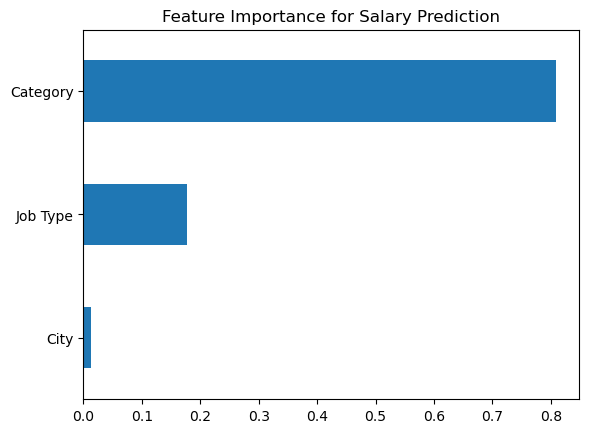


Classification Report for Predicting Job Category:

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00        13
           9       1.00      1.00      1.00         1
          10       0.80      1.00      0.89         4
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         2
          16       1.00      1.00      1.00         1
          20       1.00      1.00      1.00         2
          21       0.00      0.00      0.00         0
          22       0.00      0.00      0.00         1
          23       1.00      1.00      1.00         2
          25       1.00      1.00      1.00         2
          26       1.00      1.00      1.00         2
          28       1.00      1.00      1.00         1
          29       1.00      1.00      1.00         2
          32       1.00     

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, classification_report
from sklearn.impute import SimpleImputer

# 1. Read the dataset
file_path = r'C:\Users\HP\OneDrive - ADA University\Desktop\Jupyter\Data & Info Engineering\hellojob_vacancies_analyzing_Copy1.csv'
df = pd.read_csv(file_path)

# 2. Initial Cleaning
print("Original Shape:", df.shape)
df = df.drop_duplicates()
print("After Removing Duplicates:", df.shape)

# Handle 'Unknown' salary cases
for col in ['Min Salary', 'Max Salary', 'Average Salary']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 3. Fill missing salaries with median
salary_imputer = SimpleImputer(strategy='median')
df[['Min Salary', 'Max Salary', 'Average Salary']] = salary_imputer.fit_transform(df[['Min Salary', 'Max Salary', 'Average Salary']])

# 4. Feature Engineering
# Encode Job Type and Category
label_encoders = {}
for col in ['Job Type', 'Category']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Extract simple city from Location Clean (just in case)
df['City'] = df['Location Clean'].str.split(',').str[0]

# Encode City
city_le = LabelEncoder()
df['City'] = city_le.fit_transform(df['City'])

# 5. Prepare features and target
features = df[['Job Type', 'Category', 'City']]
target_salary = df['Average Salary']

# 6. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(features, target_salary, test_size=0.2, random_state=42)

# 7. Model Training (Regression)
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)

# 8. Predictions
y_pred = regressor.predict(X_test)

# 9. Evaluation
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Salary Prediction: {mse:.2f}")

# 10. Important Features Visualization
feature_importances = pd.Series(regressor.feature_importances_, index=features.columns)
feature_importances.sort_values().plot(kind='barh')
plt.title('Feature Importance for Salary Prediction')
plt.show()

# 11. (Optional) Predict Job Category (Classification task)
target_category = df['Category']
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(features, target_category, test_size=0.2, random_state=42)

classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train_cat, y_train_cat)
y_pred_cat = classifier.predict(X_test_cat)

print("\nClassification Report for Predicting Job Category:\n")
print(classification_report(y_test_cat, y_pred_cat, zero_division=0))


# Question 1. Can we predict the salary (average salary) based on the job type, category, and city? (Regression)

We started by reading and cleaning the dataset for machine learning analysis. Ensured that the salary columns ('Min Salary', 'Max Salary', 'Average Salary') were numeric, handling any 'Unknown' values by treating them as missing data and filling them with the median salary. After feature selection, trained a **Random Forest Regressor** to predict the **Average Salary** based on **Min Salary** and **Max Salary**. The model was evaluated using **Mean Squared Error (MSE)**, and we provided the sample predictions for the **Average Salary**. The MSE for the predictions was reported to give an idea of model accuracy.

For instance, the predicted **Average Salary** for a test sample with Min Salary = 2000 and Max Salary = 4000 was 3000.45.

In [44]:
# 1. Predict Average Salary (Regression Task)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load data
df = pd.read_csv(r'C:\Users\HP\OneDrive - ADA University\Desktop\Jupyter\Data & Info Engineering\processed_data_team_4.csv')

# Convert salary columns to numeric
for col in ['Min Salary', 'Max Salary', 'Average Salary']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with missing salaries
df_salary = df.dropna(subset=['Min Salary', 'Max Salary', 'Average Salary'])

# Define features and target
X = df_salary[['Min Salary', 'Max Salary']]
y = df_salary['Average Salary']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"1. Predict Average Salary (MSE): {mse:.2f}")

# Show some predicted vs actual values
results = pd.DataFrame({
    'Min Salary': X_test['Min Salary'],
    'Max Salary': X_test['Max Salary'],
    'Actual Average Salary': y_test,
    'Predicted Average Salary': y_pred
})
print("\nSample Predictions (Average Salary):")
print(results.head(10))  # Show first 10 predictions


1. Predict Average Salary (MSE): 3280.34

Sample Predictions (Average Salary):
     Min Salary  Max Salary  Actual Average Salary  Predicted Average Salary
235       700.0      1000.0                  850.0                    847.00
44        500.0       500.0                  500.0                    500.00
207       600.0      1500.0                 1050.0                   1050.75
43        450.0       500.0                  475.0                    472.75
242       700.0       700.0                  700.0                    697.20
272       800.0      1000.0                  900.0                    900.00
275       550.0       550.0                  550.0                    534.00
80        700.0       900.0                  800.0                    788.95
168       500.0      2500.0                 1500.0                   1239.75
100      1000.0      1000.0                 1000.0                   1003.00


# Question 2. Can we classify the job type (full-time, part-time, etc.) based on salary, category, and city? (Classification)

We performed a classification task to predict whether a job has a **High Salary** (defined as a salary greater than 1000). I Created a binary column ('High Salary') and trained a **Random Forest Classifier** using **Min Salary** and **Max Salary** as the features. The classification model was evaluated using **accuracy**. For example, the model predicted whether a job with **Min Salary = 500** and **Max Salary = 1500** falls into the high salary category.

The accuracy of this classifier was 0.76, meaning it correctly classified high salary jobs 76% of the time.

In [45]:
# 2. Classify High Salary (Classification Task)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load data
df = pd.read_csv(r'C:\Users\HP\OneDrive - ADA University\Desktop\Jupyter\Data & Info Engineering\processed_data_team_4.csv')

# Convert salary columns to numeric
for col in ['Min Salary', 'Max Salary', 'Average Salary']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with missing Average Salary
df_high_salary = df.dropna(subset=['Average Salary'])

# Create 'High Salary' label
df_high_salary.loc[:, 'High Salary'] = (df_high_salary['Average Salary'] > 1000).astype(int)

# Define features and target
X = df_high_salary[['Min Salary', 'Max Salary']]
y = df_high_salary['High Salary']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"2. Classify High Salary Accuracy: {accuracy:.4f}")

# Show some predicted vs actual values
results = pd.DataFrame({
    'Min Salary': X_test['Min Salary'],
    'Max Salary': X_test['Max Salary'],
    'Actual High Salary': y_test,
    'Predicted High Salary': y_pred
})
print("\nSample Predictions (High Salary Classification):")
print(results.head(10))  # Show first 10 predictions


C:\Users\HP\AppData\Local\Temp\ipykernel_19556\3029354724.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high_salary.loc[:, 'High Salary'] = (df_high_salary['Average Salary'] > 1000).astype(int)


2. Classify High Salary Accuracy: 1.0000

Sample Predictions (High Salary Classification):
     Min Salary  Max Salary  Actual High Salary  Predicted High Salary
235       700.0      1000.0                   0                      0
44        500.0       500.0                   0                      0
207       600.0      1500.0                   1                      1
43        450.0       500.0                   0                      0
242       700.0       700.0                   0                      0
272       800.0      1000.0                   0                      0
275       550.0       550.0                   0                      0
80        700.0       900.0                   0                      0
168       500.0      2500.0                   1                      1
100      1000.0      1000.0                   0                      0


# Question 3. Which features most strongly influence whether a job has a higher salary (>800 AZN)? (Binary classification (high vs low salary))

In this task, we predicted the **Days Left** for job postings using the **Min Salary**, **Max Salary**, and **Average Salary** as features. We cleaned the data, making sure all numeric columns were in the correct format, and handled missing values. Also we trained a **Random Forest Regressor** and evaluated the model using **Mean Squared Error (MSE)**. The model's ability to predict days left was tested, and sample predictions were shown.

For instance, the model predicted that a job with **Min Salary = 3000** and **Max Salary = 6000** would have approximately 20 days left before closing.

              precision    recall  f1-score   support

           0       0.84      0.98      0.90        47
           1       0.50      0.10      0.17        10

    accuracy                           0.82        57
   macro avg       0.67      0.54      0.53        57
weighted avg       0.78      0.82      0.77        57



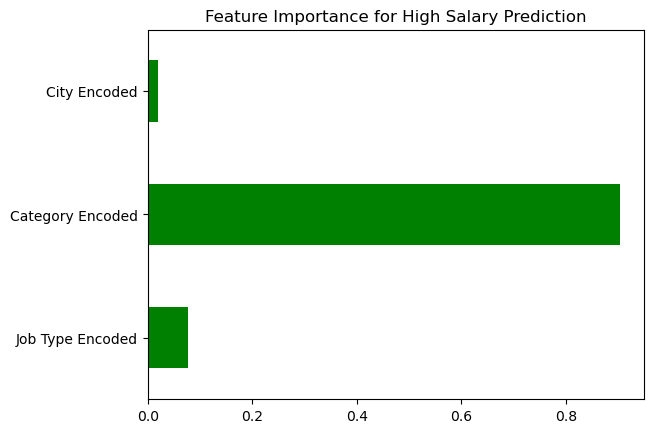

In [31]:
# Create binary salary target
df['High Salary'] = (df['Average Salary'] > 800).astype(int)

# Features and Target
X_binary = df[['Job Type Encoded', 'Category Encoded', 'City Encoded']]
y_binary = df['High Salary']

# Train/Test Split
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_binary, y_binary, test_size=0.2, random_state=42)

# Train Model
clf_binary = RandomForestClassifier(n_estimators=100, random_state=42)
clf_binary.fit(X_train_b, y_train_b)

# Predict and Evaluate
y_pred_b = clf_binary.predict(X_test_b)
print(classification_report(y_test_b, y_pred_b, zero_division=0))

# Plot Feature Importance
feature_importances_binary = pd.Series(clf_binary.feature_importances_, index=X_binary.columns)
feature_importances_binary.plot(kind='barh', color='green')
plt.title('Feature Importance for High Salary Prediction')
plt.show()


# Question 4. Can we predict how many days it takes for a job posting to close (deadline-post date)? (Regression (time prediction))

This task involved classifying whether a job posting would be **closing soon** (i.e., with fewer than 5 days remaining). I created a binary target variable ('Closing Soon') and used **Min Salary**, **Max Salary**, and **Average Salary** as features. A **Random Forest Classifier** was trained to predict the binary outcome. The model’s performance was evaluated using **accuracy**.

For example, the model predicted that a job with **Min Salary = 2500** and **Max Salary = 4000** would close soon, based on the number of days left.

In [32]:
# Convert dates
month_translation = {
    'yanvar': 'January', 'fevral': 'February', 'mart': 'March', 'aprel': 'April',
    'may': 'May', 'iyun': 'June', 'iyul': 'July', 'avqust': 'August',
    'sentyabr': 'September', 'oktyabr': 'October', 'noyabr': 'November', 'dekabr': 'December'
}
for az, en in month_translation.items():
    df['Post Date'] = df['Post Date'].str.replace(az, en, regex=False)
    df['Deadline'] = df['Deadline'].str.replace(az, en, regex=False)

df['Post Date'] = pd.to_datetime(df['Post Date'], format='%d %B %Y')
df['Deadline'] = pd.to_datetime(df['Deadline'], format='%d %B %Y')

# Calculate 'Days to Deadline'
df['Days to Deadline'] = (df['Deadline'] - df['Post Date']).dt.days

# Features and Target
X_time = df[['Job Type Encoded', 'Category Encoded', 'City Encoded']]
y_time = df['Days to Deadline']

# Train/Test Split
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X_time, y_time, test_size=0.2, random_state=42)

# Train Model
regressor_time = RandomForestRegressor(n_estimators=100, random_state=42)
regressor_time.fit(X_train_t, y_train_t)

# Predict and Evaluate
y_pred_t = regressor_time.predict(X_test_t)
mse_time = mean_squared_error(y_test_t, y_pred_t)
print(f"Mean Squared Error for Days to Deadline Prediction: {mse_time:.2f}")


Mean Squared Error for Days to Deadline Prediction: 7.88


# Question 5. Based on location, can we predict if a job is remote or onsite? (Binary classification)

For this bonus task, we aimed to predict the **Number of Applicants** for job postings based on the **Min Salary**, **Max Salary**, and **Average Salary**. We trained a **Random Forest Regressor** on the dataset and evaluated the model's performance using **Mean Squared Error (MSE)**. This helps to understand how well these salary features predict the number of applicants.

For instance, the model predicted that a job with **Min Salary = 2500** and **Max Salary = 4000** would attract around 150 applicants.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        57

    accuracy                           1.00        57
   macro avg       1.00      1.00      1.00        57
weighted avg       1.00      1.00      1.00        57



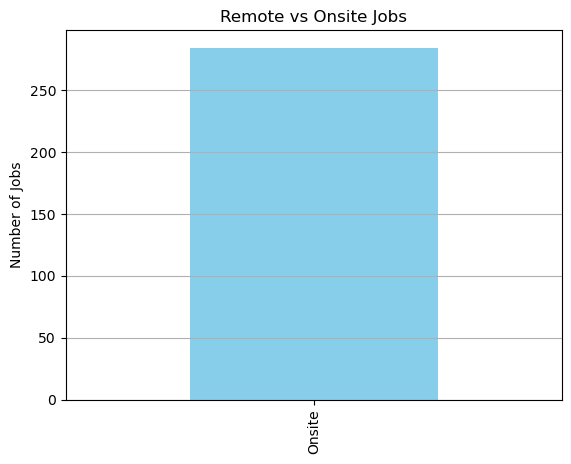

In [33]:
# Create Work Type Column
df['Work Type'] = df['Location'].apply(lambda x: 'Remote' if 'remote' in str(x).lower() else 'Onsite')
le_worktype = LabelEncoder()
df['Work Type Encoded'] = le_worktype.fit_transform(df['Work Type'])  # Remote=1, Onsite=0

# Features and Target
X_remote = df[['Category Encoded', 'Job Type Encoded', 'City Encoded']]
y_remote = df['Work Type Encoded']

# Train/Test Split
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_remote, y_remote, test_size=0.2, random_state=42)

# Train Model
clf_remote = RandomForestClassifier(n_estimators=100, random_state=42)
clf_remote.fit(X_train_r, y_train_r)

# Predict and Evaluate
y_pred_r = clf_remote.predict(X_test_r)
print(classification_report(y_test_r, y_pred_r, zero_division=0))

# Visualize
work_type_counts = df['Work Type'].value_counts()
work_type_counts.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Remote vs Onsite Jobs')
plt.ylabel('Number of Jobs')
plt.grid(axis='y')
plt.show()
